<a href="https://colab.research.google.com/github/Vinaya1204/FMML_2023/blob/Lab-1/Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

# **PART-1:Feature of text**

1.Trying with different languages-Dutch and Italian.

Downloading a few documents off Wikipedia.

In [34]:
topic1 = 'hockey'
topic2 = 'telugu'

wikipedia.set_lang('de')

dut1 = wikipedia.page(topic1).content
dut2 = wikipedia.page(topic2).content

wikipedia.set_lang('it')

itl1 = wikipedia.page(topic1).content
itl2 = wikipedia.page(topic2).content

This is what the text looks like about Hockey in Dutch:

In [35]:
dut1

'Hockey (altfranzösisch hoquet, „Schäferstock“) ist ein mit Hockeyschlägern auszuführendes Ballspiel, das auf Rasen (heutzutage vorwiegend auf Kunstrasen) als Feldhockey und in der Halle als Hallenhockey gespielt wird. Hockey ist seit 1908 eine olympische Sportart. Der Welthockeyverband ist die Fédération Internationale de Hockey.\nAusgehend vom traditionellen Hockey, das in der Schweiz und Österreich auch Landhockey genannt wird, haben sich weitere Hockeysportarten gebildet, von denen Eishockey die bekannteste ist. Andere sind: Bandy, Rollhockey, Inline-/Skaterhockey, Unihockey/Floorball, Streethockey, Einradhockey, Rollstuhl-Hockey und Unterwasserhockey.\n\n\n== Verbreitung und Geschichte ==\nHockey ist eine Mannschaftssportart. Im mitteleuropäischen Raum wird neben Feldhockey auch Hallenhockey (nur in den Wintermonaten) gespielt, wobei das Regelwerk leicht von dem des Feldhockeys abweicht. Das internationale Feldhockey wurde lange Zeit von den ehemaligen britischen Kolonien Indien u

We need to clean this up a bit.We will remove accented characters in Dutch also. We are also removing all the numbers and spaces.

In [5]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [36]:
dut1 = cleanup(dut1)
dut2 = cleanup(dut2)
itl1 = cleanup(itl1)
itl2 = cleanup(itl2)

In [37]:
print(dut1)

hockeyaltfranzsischhoquetschferstockisteinmithockeyschlgernauszufhrendesballspieldasaufrasenheutzutagevorwiegendaufkunstrasenalsfeldhockeyundinderhallealshallenhockeygespieltwirdhockeyistseiteineolympischesportartderwelthockeyverbandistdiefdrationinternationaledehockeyausgehendvomtraditionellenhockeydasinderschweizundsterreichauchlandhockeygenanntwirdhabensichweiterehockeysportartengebildetvondeneneishockeydiebekanntesteistanderesindbandyrollhockeyinlineskaterhockeyunihockeyfloorballstreethockeyeinradhockeyrollstuhlhockeyundunterwasserhockeyverbreitungundgeschichtehockeyisteinemannschaftssportartimmitteleuropischenraumwirdnebenfeldhockeyauchhallenhockeynurindenwintermonatengespieltwobeidasregelwerkleichtvondemdesfeldhockeysabweichtdasinternationalefeldhockeywurdelangezeitvondenehemaligenbritischenkolonienindienundpakistandominiertdietraditionellbertechnischsehrversiertespielerverfgtenseitendedererjahrewirdhockeyzunehmenddurchathletikundtaktikgeprgtdieeuropischenlnderbelgienniederlandes

Now let us calculate the frequency of the character n-grams.Let us count the frequency of each character in a text and plot it in a histogram.

In [38]:
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

def key2string(keys):
  return [tuple2string(i) for i in keys]

def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of Dutch pages and Italian pages.

Unigram for Dutch

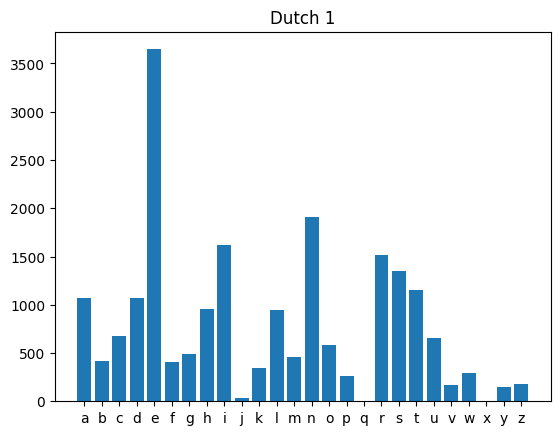

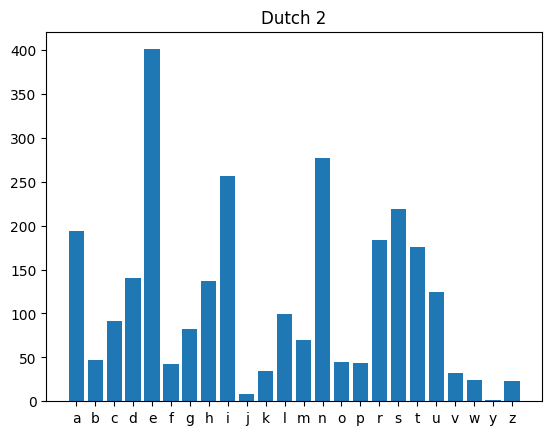

In [39]:
unigram_dut1 = Counter(ngrams(dut1,1))
plothistogram(unigram_dut1)
plt.title('Dutch 1')
plt.show()
unigram_dut2 = Counter(ngrams(dut2,1))
plothistogram(unigram_dut2)
plt.title('Dutch 2')
plt.show()

Unigram for Italian

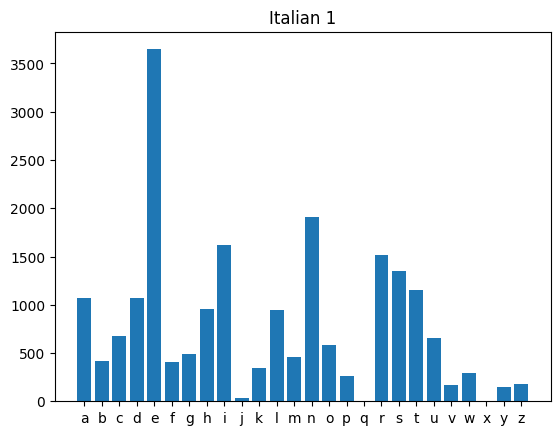

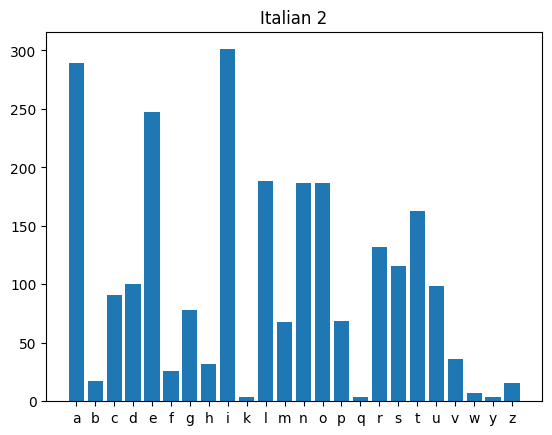

In [40]:
unigram_itl1 = Counter(ngrams(itl1,1))
plothistogram(unigram_dut1)
plt.title('Italian 1')
plt.show()
unigram_itl2 = Counter(ngrams(itl2,1))
plothistogram(unigram_itl2)
plt.title('Italian 2')
plt.show()

Unigram for Dutch and Italian are very similar.Now let us see the Bigrams.

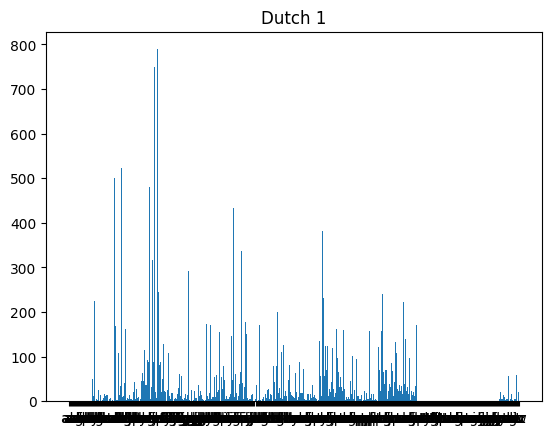

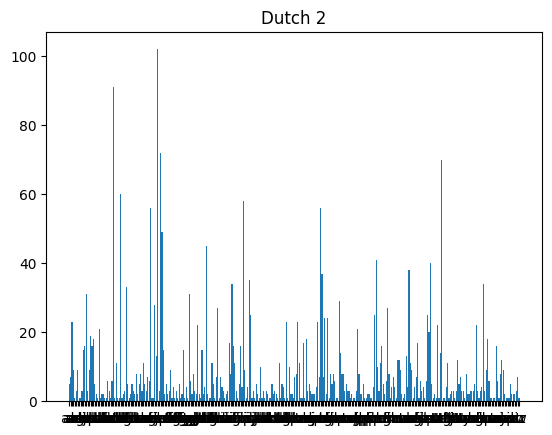

In [41]:
bigram_dut1 = Counter(ngrams(dut1,2))
plothistogram(bigram_dut1)
plt.title('Dutch 1')
plt.show()

bigram_dut2 = Counter(ngrams(dut2,2))
plothistogram(bigram_dut2)
plt.title('Dutch 2')
plt.show()

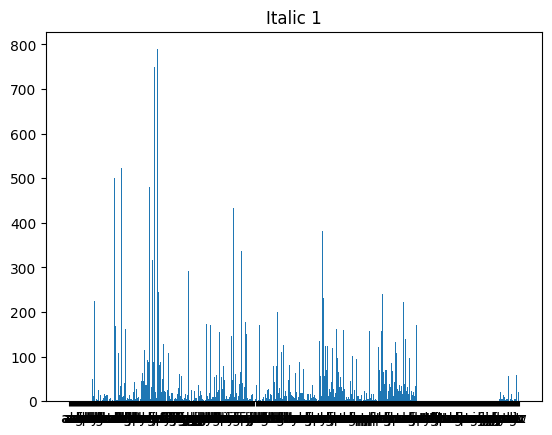

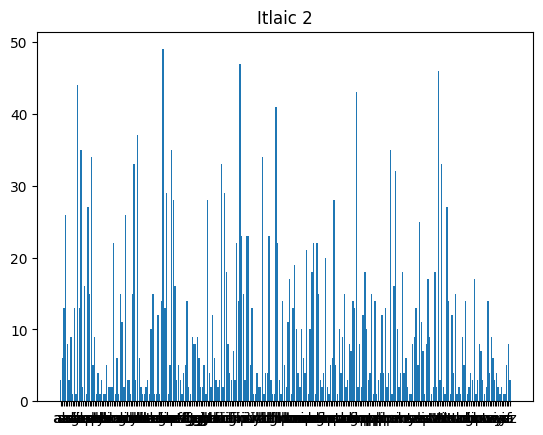

In [42]:
bigram_itl1 = Counter(ngrams(itl1,2))
plothistogram(bigram_dut1)
plt.title('Italic 1')
plt.show()

bigram_itl2 = Counter(ngrams(itl2,2))
plothistogram(bigram_itl2)
plt.title('Itlaic 2')
plt.show()

Visualizing Bigrams in 2-dimensional graph.

In [43]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

Dutch

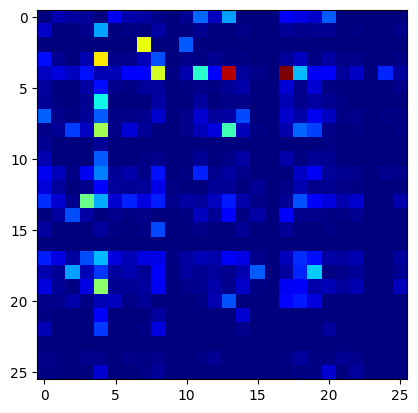

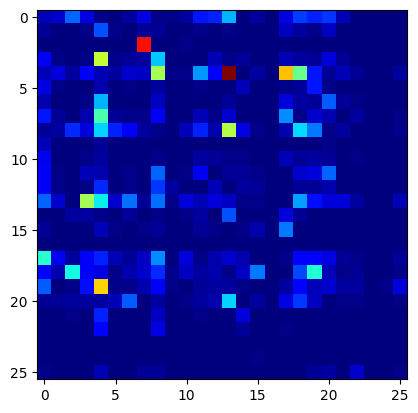

In [44]:
bidut1 = plotbihistogram(bigram_dut1)
plt.show()
bidut2 = plotbihistogram(bigram_dut2)

Italian

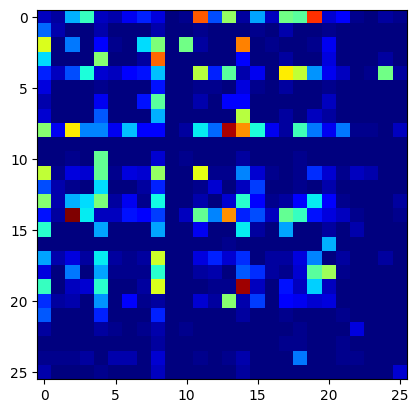

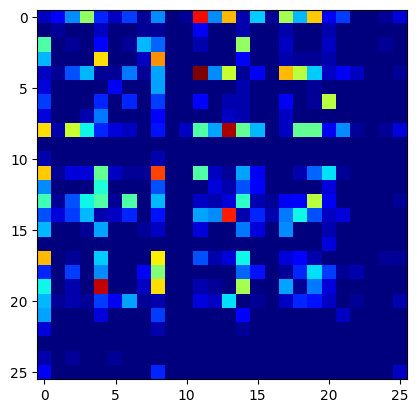

In [45]:
biitl1 = plotbihistogram(bigram_itl1)
plt.show()
biitl2 = plotbihistogram(bigram_itl2)

Top 10 ngrams for each text.

In [20]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

Dutch

In [46]:
print('\nDutch 1:')
ShowTopN(bidut1)
print('\nDutch 2:')
ShowTopN(bidut2)



Dutch 1:
('e', 'r') : 789.0
('e', 'n') : 749.0
('d', 'e') : 523.0
('c', 'h') : 500.0
('e', 'i') : 480.0
('i', 'e') : 434.0
('t', 'e') : 410.0
('n', 'd') : 381.0
('i', 'n') : 336.0
('e', 'l') : 316.0

Dutch 2:
('e', 'n') : 102.0
('c', 'h') : 91.0
('e', 'r') : 72.0
('t', 'e') : 70.0
('d', 'e') : 60.0
('i', 'n') : 58.0
('e', 'i') : 56.0
('n', 'd') : 56.0
('e', 's') : 49.0
('h', 'e') : 45.0


Italian

In [47]:
print('\nItalian 1:')
ShowTopN(biitl1)
print('\nItalian 2:')
ShowTopN(biitl2)


Italian 1:
('o', 'c') : 70.0
('t', 'o') : 68.0
('i', 'n') : 67.0
('a', 't') : 60.0
('a', 'l') : 57.0
('d', 'i') : 56.0
('c', 'o') : 54.0
('o', 'n') : 53.0
('i', 'o') : 53.0
('e', 'r') : 46.0

Italian 2:
('e', 'l') : 49.0
('i', 'n') : 47.0
('t', 'e') : 46.0
('a', 'l') : 44.0
('o', 'n') : 43.0
('l', 'i') : 41.0
('d', 'i') : 37.0
('e', 'r') : 35.0
('r', 'a') : 35.0
('a', 'n') : 35.0


2.In this example we have taken two different topics-Hockey and Telugu.
We can observe that Unigrams for Dutch and Italian are very similar.And Bigrams are similar across different topics but different across the languages.

3.Now let us try Trigrams.

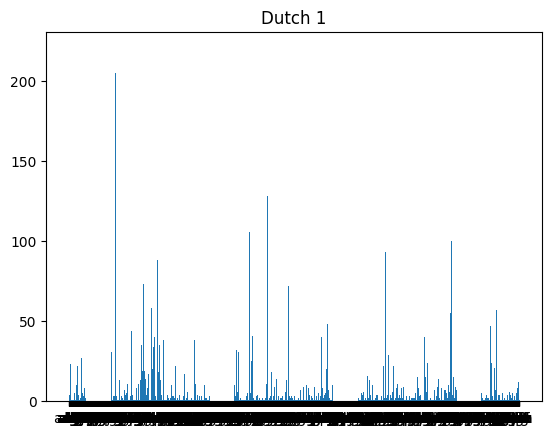

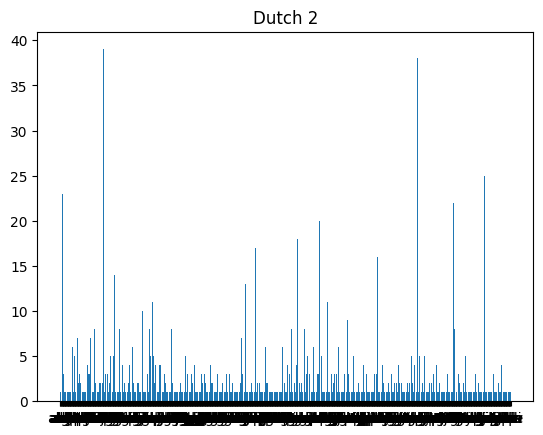

In [49]:
trigram_dut1 = Counter(ngrams(dut1,3))
plothistogram(trigram_dut1)
plt.title('Dutch 1')
plt.show()

trigram_dut2 = Counter(ngrams(dut2,3))
plothistogram(trigram_dut2)
plt.title('Dutch 2')
plt.show()


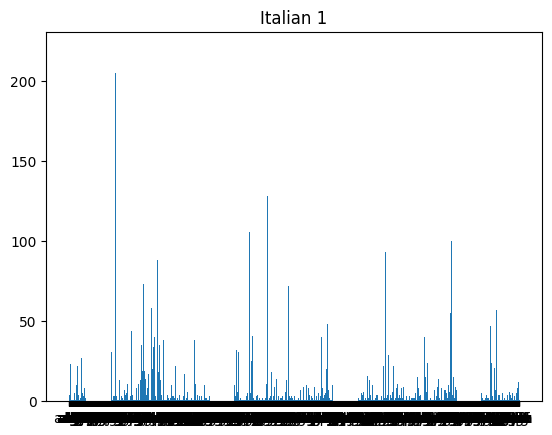

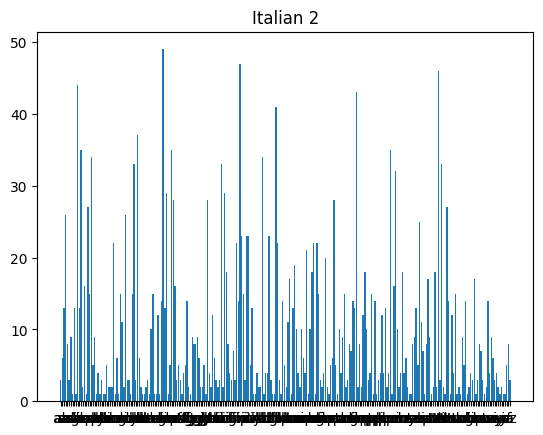

In [50]:
trigram_itl1 = Counter(ngrams(itl1,3))
plothistogram(trigram_dut1)
plt.title('Italian 1')
plt.show()

trigram_itl2 = Counter(ngrams(itl2,2))
plothistogram(trigram_itl2)
plt.title('Italian 2')
plt.show()

# **PART 2:Written Numbers**

Answers


1.In order to train an ML model, we can use strategies such as feature selection or feature priority ranking. The best combination of features is the set of features that yields the best model performance.


2.We can test or visualize four or more features using-Scatter plots,Pair plots.

3.Yes, we are capable of developing our own method.Featuring engineering must be present for ML.

4.According to the features, some of them function while others do not.

5.If we enrol in more than two classes at once, we must ensure that the ML model can support multiclass classification.